# Predicting Diabetes in Pima Indian database using Machine Learning

This notebook looks into using various python based machine learning libraries in an attempt to build a module to predict whether or not someone has Diabetes.

   1. Probelem definition
   2. Data 
   3. Evaluation
   4. Features
   5. Modelling
   6. Experimenting

# 1. Problem definition
The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage

# 2. Data
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases and was taken from Kaggle with a link of https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database?resource=download. 

# 3. Evaluation
> If we can reach 95% accuracy of predicting whether or not a patient has diabetes during the proof of concept.

# 4 Features

This is the explanation about each column of the dataset.

1. Pregnancies =  Number of times pregnant
2. Glucose =  Plasma glucose concentration a 2hours in an oral glucose tolerance test
3. Blood pressure = Diastolic blood pressure ( mm Hg)
4. Skin thickness = Triceps skin fold thickness(mm)
5. Insulin = 2 hour serum insulin (mu U/ml)
6. BMI = Body mass index ( weight in kg(height in m)^2)
7. Diabetes Pedigree =Diabetes pedigree function
8. Age (years)
9. Outcome(target) = class variable(0=no,1=yes), 268 of 768 are 1 and the rest are 0

In [56]:
# Lets import scikit learn librabry
!pip install scikit_learn

In [57]:
# Import all the libraries needed at this time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#models from scikit_learn

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

#model evaluation 
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV,GridSearchCV,KFold
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score


## Load data

In [58]:
df=pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Data exploratory

In [59]:
# finding how many have diabetes or not in the target column(Outcome)

df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

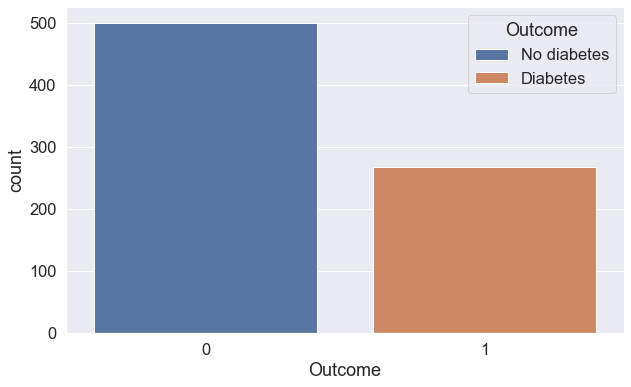

In [60]:
# Visualizing to see the total of the target column( outcome)
sns.countplot(data=df,x="Outcome",hue='Outcome',dodge=False)
plt.legend(title="Outcome",labels=['No diabetes','Diabetes']);

In [61]:
# Checking the counts for each column and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [62]:
#looking for null 
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

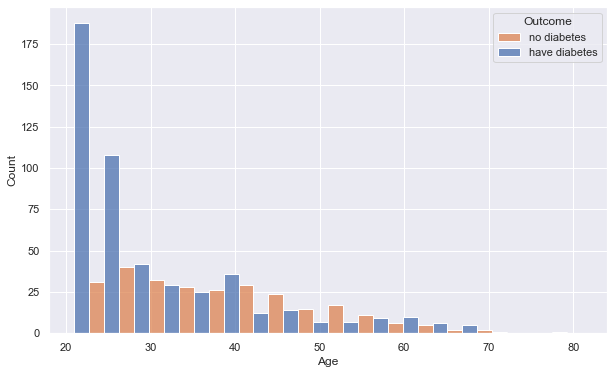

In [63]:
# Lets check age and how it correlates with having diabetes or not
sns.set()
sns.set(rc={"figure.figsize":(10, 6)})
sns.histplot(data=df, x=df.Age, hue="Outcome", multiple="dodge")
plt.legend(title="Outcome",labels=['no diabetes','have diabetes']);

### A look at the entire dataset distribution

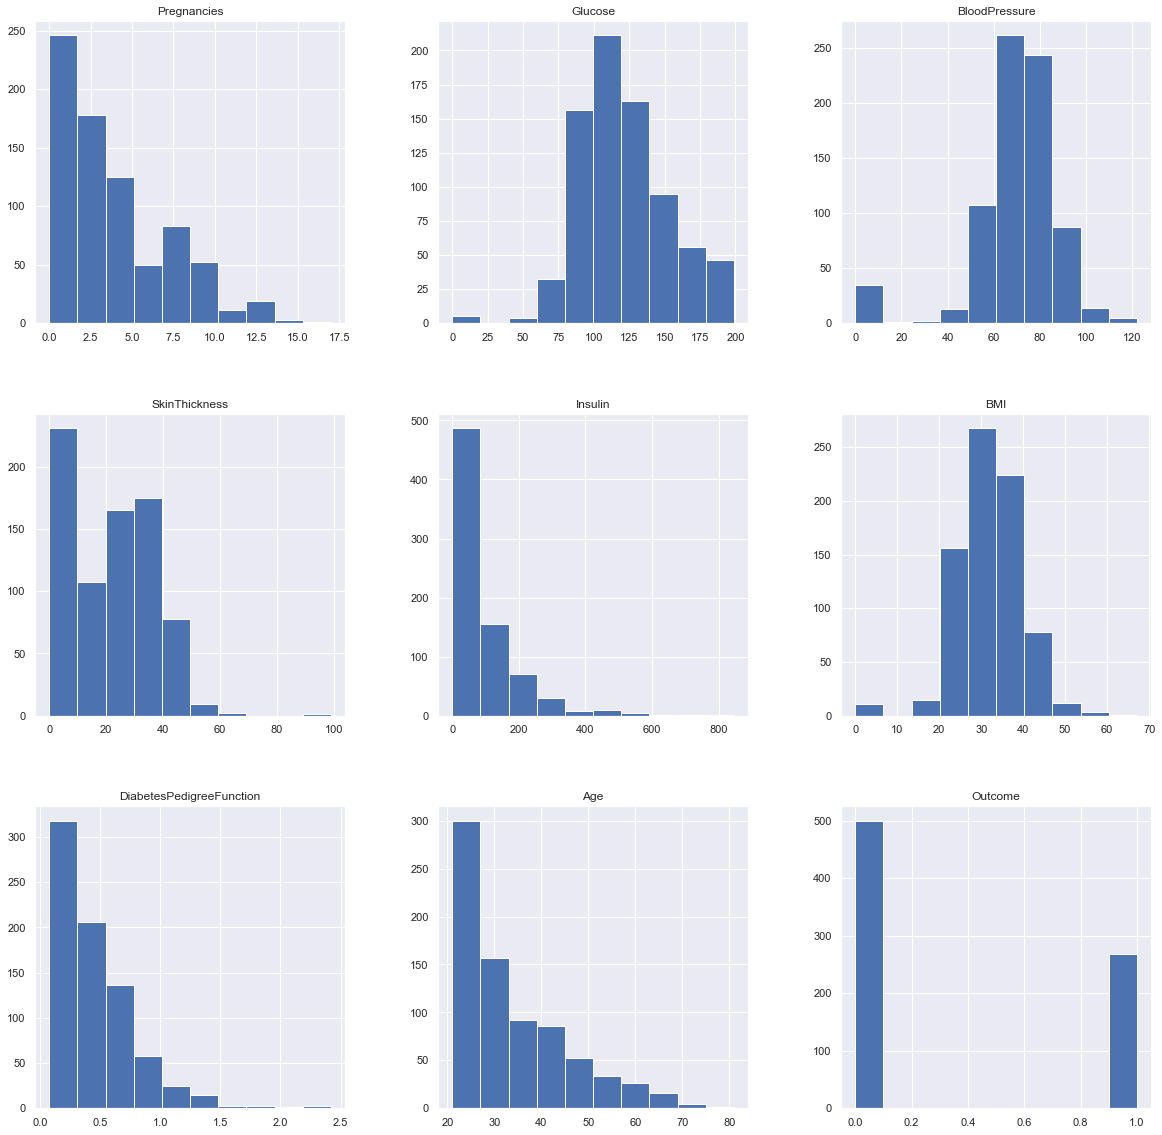

In [64]:
p = df.hist(figsize = (20,20))

In [65]:
#Checking the statistical description of each column
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Looking at this statistics, the minimum for the following is Zero(0) which should not be so medically
    1. Glucose
    2. Blood Pressure
    3. Skin Thickness
    4. Insulin
    5. BMI

The zeros need to be removed and numbers imputed. To do this, lets first replace all the zeros with nan then later do the imputation.

But first, lets make a copy of the original data so we still have it even after manipulating the copy.

In [66]:
#making a copy
df2=df.copy()
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [67]:
df2.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [68]:
# Replacing the columns with zeros to 'nan'
df2[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=df2[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [69]:
# checking the dataset again for null
df2.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

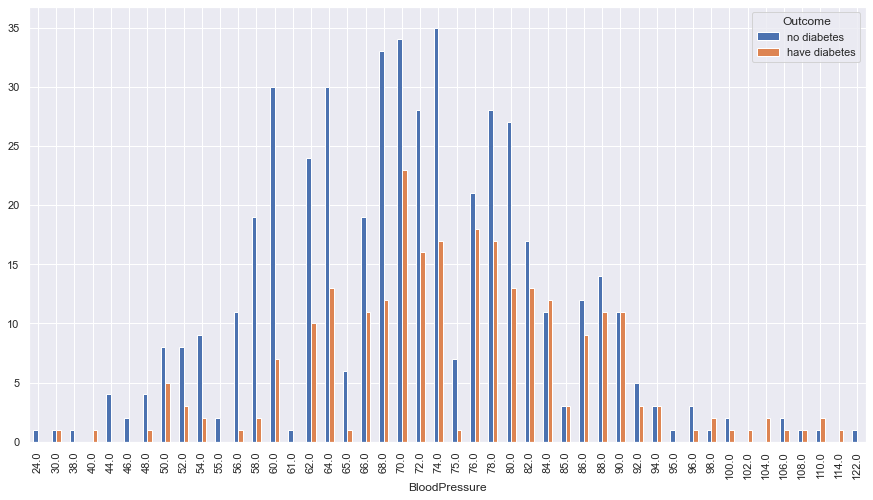

In [70]:
# Checking the relation between blood pressure and having diabetes
pd.crosstab(df2.BloodPressure,df.Outcome).plot(kind='bar',figsize=(15,8))
plt.legend(title='Outcome',labels=['no diabetes','have diabetes']);

##### The distribution above also shows us the having a blood pressue between 60 to 90 have higher chances of developing diabetes,although this standalone metric cannot be viewed alone although 

## Lets see a matrix of the various dataset

In [71]:
# Making a correlation matrix
cr=df.corr()
cr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


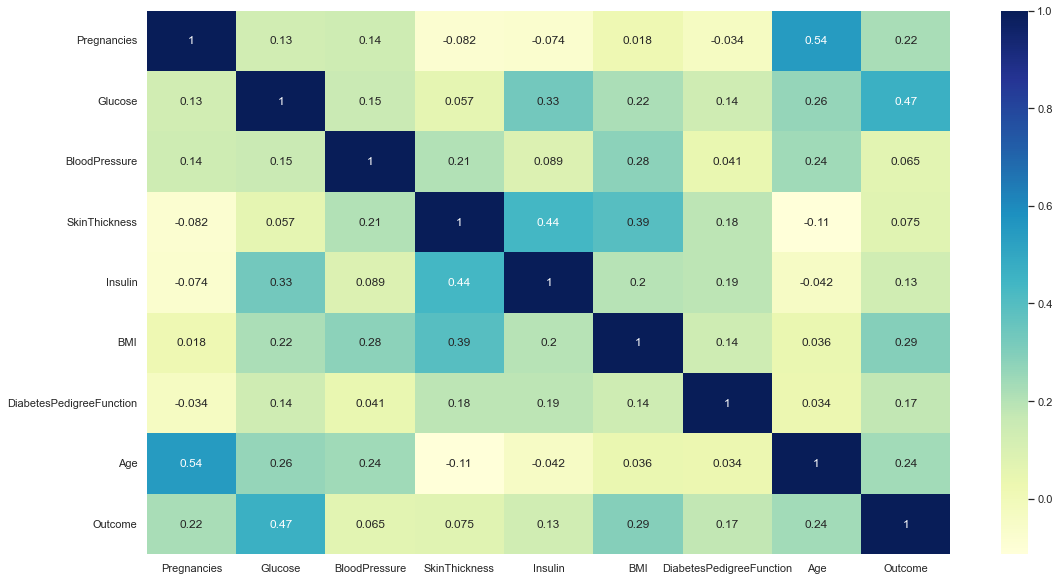

In [72]:
# Making correlatio matrix visually.
plt.figure(figsize = (18,10))
sns.heatmap(cr,cmap='YlGnBu',annot=True)
plt.show()

### Filling missing data with some values(imputation) 
To do this, first have to split our data into X and Y to avoid data leakage

In [73]:
## Fill missing data with pandas
df2['BloodPressure'].fillna(df2['BloodPressure'].mean(),inplace=True)
df2['SkinThickness'].fillna(df['SkinThickness'].mean(),inplace=True)
df2['Insulin'].fillna(df['Insulin'].mean(),inplace=True)
df2['BMI'].fillna(df['BMI'].mean(),inplace=True)
df2['Glucose'].fillna(df['Glucose'].mean(),inplace=True)

In [74]:
df2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


Now that all the missing data is filled. We have to start modelling 

# Modelling

Since the data has a wider range of values, they need to be scaled so the values are closer to each other.

In [75]:
from sklearn.preprocessing import StandardScaler

# SPlitting data into X and y
X= df2.drop('Outcome',axis=1).values
y=df2['Outcome'].values

In [76]:
#Splitting data into test and train and scaling it

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(np.mean(X),np.std(X))
print(np.mean(X_train_scaled),np.std(X_train_scaled))

51.17025630073842 57.09234713916481
-3.2836563725069776e-16 0.9999999999999994


In [77]:
from sklearn.pipeline import Pipeline
steps = [('scaler', StandardScaler()),
('knn', KNeighborsClassifier(n_neighbors=6))]
pipeline = Pipeline(steps)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=21)
knn_scaled = pipeline.fit(X_train, y_train)
y_pred = knn_scaled.predict(X_test)
print(knn_scaled.score(X_test, y_test))

0.7012987012987013


In [78]:
# Checking the X_train data
X_train

array([[7.00e+00, 1.61e+02, 8.60e+01, ..., 3.04e+01, 1.65e-01, 4.70e+01],
       [1.00e+00, 1.28e+02, 8.20e+01, ..., 2.75e+01, 1.15e-01, 2.20e+01],
       [4.00e+00, 1.32e+02, 8.60e+01, ..., 2.80e+01, 4.19e-01, 6.30e+01],
       ...,
       [3.00e+00, 8.10e+01, 8.60e+01, ..., 2.75e+01, 3.06e-01, 2.20e+01],
       [7.00e+00, 1.03e+02, 6.60e+01, ..., 3.91e+01, 3.44e-01, 3.10e+01],
       [5.00e+00, 1.62e+02, 1.04e+02, ..., 3.77e+01, 1.51e-01, 5.20e+01]])

###### Now we have to build a machine learning model which will train on the training set and tested on the test set
Three different maching learning models will be tested out
1. Logistics Regression
2. K-nearest Neighbors classifier
3. RandomForest classifier

## Lets evaluate some classification models here which are the following
1. Kneighbors
2. Decision TreeClassifier
3. Logistics Regression


C:\Users\gamponsa\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gamponsa\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gamponsa\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gamponsa\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gamponsa\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gamponsa\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, in

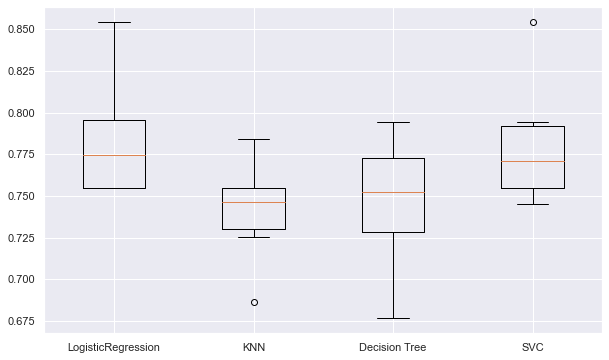

In [79]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score,KFold,train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

models={"LogisticRegression":LogisticRegression(),'KNN':KNeighborsClassifier(),
       'Decision Tree':DecisionTreeClassifier(),'SVC':LinearSVC()}

results=[]

for model in models.values():
    kf =KFold(n_splits=6,random_state=42,shuffle=True)
    
    #Perform cross-validation
    cv_scores=cross_val_score(model,X_train_scaled,y_train,cv=kf)
    
    #Append the results
    results.append(cv_scores)
    
    
plt.boxplot(results, labels=models.keys())
plt.show();

In [80]:
#Evaluating test set performance

for name,model in models.items():
    model.fit(X_train_scaled,y_train)
    test_score=model.score(X_test_scaled,y_test)
    print("{}Test set Accuracy:{}".format(name,test_score));

LogisticRegressionTest set Accuracy:0.7467532467532467
KNNTest set Accuracy:0.7207792207792207
Decision TreeTest set Accuracy:0.7207792207792207
SVCTest set Accuracy:0.7467532467532467


C:\Users\gamponsa\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### Hyperparameter tuning(KNN)

 Since Knn is lowest out of the box as compared to  logisticRegression and Decision Tree, lets tune it to see if the score can be improved


In [81]:
# Tuning KNN n_negihbors
train_scores=[]
test_scores=[]

# Create a list of different values for n_neighbors
neighbors=range(1,21)

#setup KNN instance
knn=KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    
    #fit algorithm
    knn.fit(X_train_scaled,y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train_scaled,y_train))
    
    #Update the test scores list
    test_scores.append(knn.score(X_test_scaled,y_test))

In [82]:
train_scores

[1.0,
 0.8371335504885994,
 0.8550488599348535,
 0.8094462540716613,
 0.8110749185667753,
 0.7964169381107492,
 0.8208469055374593,
 0.7980456026058632,
 0.7996742671009772,
 0.7964169381107492,
 0.7947882736156352,
 0.7947882736156352,
 0.7964169381107492,
 0.7964169381107492,
 0.8029315960912052,
 0.7833876221498371,
 0.8013029315960912,
 0.7882736156351792,
 0.7980456026058632,
 0.7882736156351792]

In [83]:
test_scores

[0.7012987012987013,
 0.6818181818181818,
 0.7207792207792207,
 0.7142857142857143,
 0.7207792207792207,
 0.7012987012987013,
 0.7597402597402597,
 0.7012987012987013,
 0.7337662337662337,
 0.6948051948051948,
 0.7272727272727273,
 0.7207792207792207,
 0.7467532467532467,
 0.7272727272727273,
 0.7402597402597403,
 0.7142857142857143,
 0.7402597402597403,
 0.7077922077922078,
 0.7272727272727273,
 0.7207792207792207]

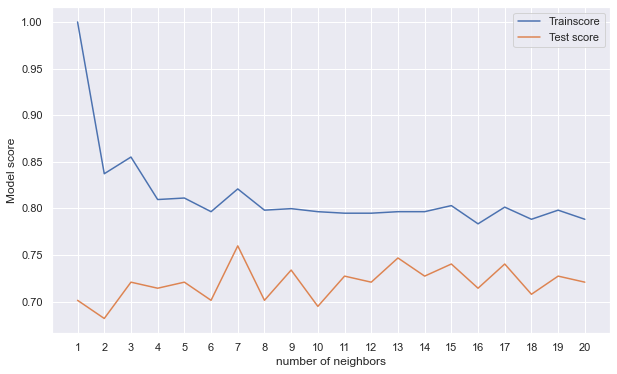

In [84]:
# Lets visualize to see which one is best
plt.plot(neighbors,train_scores,label="Trainscore")
plt.plot(neighbors,test_scores,label="Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("number of neighbors")
plt.ylabel("Model score")
plt.legend()

In [85]:
print(f"Maximum KNN score on the test data is {max(test_scores)*100:.2f}%")

Maximum KNN score on the test data is 75.97%


#### After tuning the knn, the test data score has risen to 75.9%.We will keep it and tune the LogistRegression model and the Decision treee classifier as well to see if the score is improved.


In [86]:
# Tuning the parameters for logistic regression using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
kf=KFold(n_splits=7,shuffle=True,random_state=42)
log_reg_grid={"C":np.logspace(-4,4,30),
             "solver":['liblinear'],
             "penalty":['l1','l2'],
             'tol':np.linspace(0.0001,1.0,50)}

log_reg_cv= RandomizedSearchCV(LogisticRegression(),log_reg_grid,cv=kf,n_iter=20)
log_reg_cv.fit(X_train_scaled,y_train)
print(log_reg_cv.best_params_,log_reg_cv.best_score_)

{'tol': 0.2449734693877551, 'solver': 'liblinear', 'penalty': 'l2', 'C': 2.592943797404667} 0.7801350947902671


In [87]:
# Lets do same for Decision Tree Classifier
dt_grid={
          "max_depth":[None,3,5,10,20,30],
          "min_samples_split":[2,4,6],
          "max_features":['log2','sqrt'],
          "min_samples_leaf":np.arange(1,20,2)}

dt_cv=RandomizedSearchCV(DecisionTreeClassifier(),dt_grid,cv=kf,n_iter=10)
dt_cv.fit(X_train_scaled,y_train)
print(dt_cv.best_params_,dt_cv.best_score_)

{'min_samples_split': 4, 'min_samples_leaf': 7, 'max_features': 'log2', 'max_depth': 5} 0.74602552619794


In [88]:
# Boosting the Decision tree with Adaboost classifier
from sklearn.ensemble import AdaBoostClassifier
dt=DecisionTreeClassifier(max_depth=1,random_state=42)
adb_clf= AdaBoostClassifier(estimator=dt,n_estimators=5)
adb_clf.fit(X_train_scaled,y_train)
adaboost_pred=adb_clf.predict(X_test_scaled)
#print("The accuracy of the model is:  ", accuracy_score(y_test, adaboost_pred))

In [89]:
from sklearn.ensemble import GradientBoostingClassifier
gbt=GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
gbt.fit(X_train_scaled,y_train)
gbt.score(X_test_scaled,y_test)


0.7142857142857143

### After tuning the parameters for logisticRegression and DecisionTree  classifier,the Logistic Regression model has a higher score than all the other models including the Adaboost for the DecisionTree so will go ahead and use the Logistic Regression model.

# Evaluating our tuned machine learning classifier beyond accuracy
1. ROC curve and AUC curve
2. Confusion matrix
3. Classification report
4. Precision
5. Recall
6. F1-score

In [90]:
# need to make prediction with model and best hyperparameters  
y_preds=log_reg_cv.predict(X_test_scaled)


In [91]:
# make predictions with probabilities
y_preds_probs=log_reg_cv.predict_proba(X_test_scaled)[:,1]
print(y_preds_probs[:10])

[0.32831702 0.11854336 0.09190668 0.64993957 0.57988379 0.1521842
 0.08463797 0.08565293 0.05470813 0.14720344]


**ROC curve**
* Area under curve(AUC)
* ROC curve

ROC curves are a comparision of a model's ture positive(tpr) versus a models false positive(fpr)

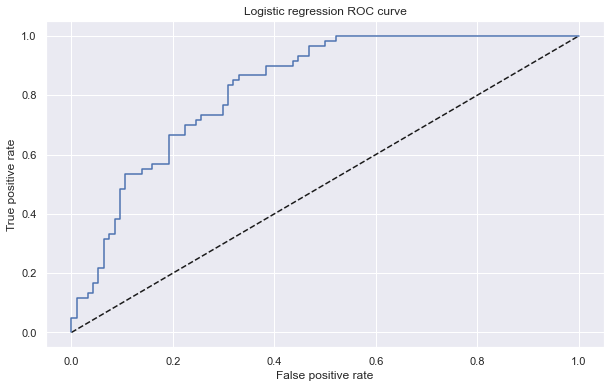

In [92]:
#plotting the ROC curve
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_test,y_preds_probs)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic regression ROC curve')
plt.show()

In [93]:
# Calculating area under curve

from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_preds_probs))

0.8265957446808511


**Confusion matrix**

In [94]:
confusion_matrix(y_test,y_preds)

array([[84, 10],
       [29, 31]], dtype=int64)

In [95]:
import sklearn
sklearn.__version__

'1.2.2'

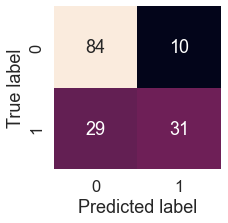

In [96]:
# Visualizing Confusion Matrix
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size
 
def plot_conf_mat(y_test,y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 
    
plot_conf_mat(y_test, y_preds)

In [97]:
# looking at the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.74      0.89      0.81        94
           1       0.76      0.52      0.61        60

    accuracy                           0.75       154
   macro avg       0.75      0.71      0.71       154
weighted avg       0.75      0.75      0.73       154



In [98]:
# Creating a new classifier with best parameters for the Logistic Regression model
clf=LogisticRegression(tol=0.2653795918367347,
                       solver='liblinear',
                       penalty='l2', 
                       C=1.3738237958832638)

In [99]:
!conda update conda 
!pip install -U scikit-learn


UnavailableInvalidChannel: The channel is not accessible or is invalid.
  channel name: conda-forged
  channel url: https://conda.anaconda.org/conda-forged
  error code: 404

You will need to adjust your conda configuration to proceed.
Use `conda config --show channels` to view your configuration's current state,
and use `conda config --show-sources` to view config file locations.




In [100]:
#Lets evaluate our model using evaluation functions
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

print(f"Accuracy:{accuracy_score(y_test,y_preds)*100:.2f}%")
print(f"Precision:{precision_score(y_test,y_preds)}")
print(f"Recall:{recall_score(y_test,y_preds)}")
print(f"F1:{f1_score(y_test,y_preds)}")

Accuracy:74.68%
Precision:0.7560975609756098
Recall:0.5166666666666667
F1:0.6138613861386139


In [101]:
# Cross validation accuracy
scalar=StandardScaler()
pipeline1=Pipeline([('transformer',scalar),('estimator',clf)])
cv_acc=cross_val_score(pipeline1,
                      X,
                      y,
                      cv=5,
                      scoring='accuracy')
cv_acc=np.mean(cv_acc)
cv_acc

0.7708598590951532

In [102]:
# Cross validation precision
cv_precision=cross_val_score(pipeline1,
                      X,
                      y,
                      cv=5,
                      scoring='precision')
cv_precision=np.mean(cv_precision)
cv_precision

0.7307973474994751

In [103]:
# Cross validation recall
cv_recall=cross_val_score(pipeline1,
                      X,
                      y,
                      cv=5,
                      scoring='recall')
cv_recall=np.mean(cv_recall)
cv_recall

0.5485674353598882

In [104]:
# Cross validation F1
cv_F1=cross_val_score(pipeline1,
                      X,
                      y,
                      cv=5,
                      scoring='recall')
cv_F1=np.mean(cv_F1)
cv_F1

0.5485674353598882

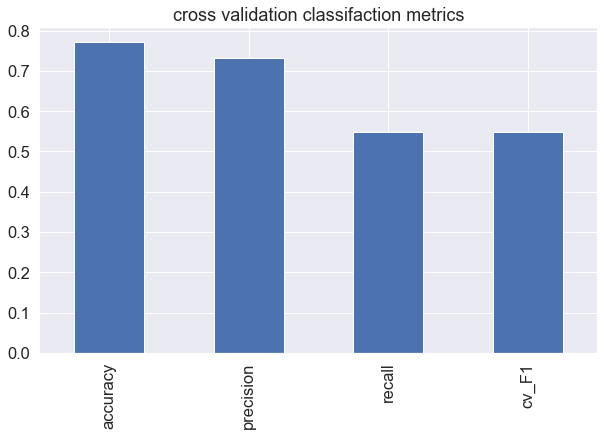

In [105]:
#visualize the cross validation results
cv_metrics=pd.DataFrame({'accuracy':cv_acc,
                        'precision':cv_precision,
                        'recall':cv_recall,
                        'cv_F1':cv_F1},
                        index=[0]
                       )
cv_metrics.T.plot.bar(title='cross validation classifaction metrics',
                      legend=False);

### Feature importance

In [106]:
clf.fit(X_train_scaled,y_train)

LogisticRegression(C=1.3738237958832638, solver='liblinear',
                   tol=0.2653795918367347)

In [107]:
#Check coef_
clf.coef_

array([[ 0.33388383,  1.08704523, -0.13476995, -0.04088505, -0.14225613,
         0.62770001,  0.24831313,  0.24134531]])

In [108]:
#Match coef of features to columns
feature_dict=dict(zip(df2.columns,list(clf.coef_[0])))
feature_dict

{'Pregnancies': 0.33388382970794,
 'Glucose': 1.0870452272530753,
 'BloodPressure': -0.13476994661700625,
 'SkinThickness': -0.0408850486263074,
 'Insulin': -0.14225612624420522,
 'BMI': 0.6277000083727661,
 'DiabetesPedigreeFunction': 0.24831312808604103,
 'Age': 0.24134530677126273}

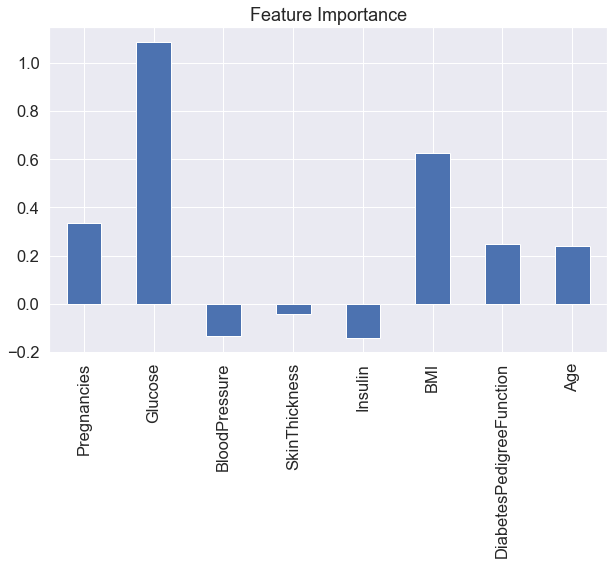

In [109]:
#Lets visualize the feature importance 
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importance",legend=False);

In [110]:
pd.crosstab(df2['Pregnancies'],df2['Outcome'])

Outcome,0,1
Pregnancies,,
0,73,38
1,106,29
2,84,19
3,48,27
4,45,23
5,36,21
6,34,16
7,20,25
8,16,22


 It could be inferred from this that the top three affecting and influencing the rate of diabetes are
* Glucose
* BMI
* Pregnancies